In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-advection-upwind)=
# Upwinding and stability

```{index} advection equation
```

Let's focus on the constant-velocity linear advection equation,

:::{math}
  :label: advectioncc
  u_t + c u_x = 0, \quad u(0,x)=u_0(x).
:::

For now, we suppose there are no boundaries. Keep in mind that $c$ is a velocity, not a speed: if $c>0$, solutions travel rightward, and if $c<0$, they travel leftward.

```{index} ! domain of dependence, ! upwind direction
```
In {numref}`section-advection-traffic` we argued that $u(x,t)=\psi(x-ct)$ is a solution of {eq}`advectioncc`. It's therefore clear that $u(x,t)=u_0(x-ct)$. 

(definition-upwind-domdep)=
::::{proof:definition} Domain of dependence
Let $u(x,t)$ be the solution of an evolutionary PDE with initial condition $u_0(x)$. The  **domain of dependence** of the solution at $(x,t)$ is the set of all $x$ such that $u_0(x)$ can possibly affect $u(x,t)$. If this domain of dependence lies entirely in one direction relative to $x$, then that direction is called the **upwind** direction of the PDE, and its opposite is the **downwind** direction.
::::

In the advection equation, the domain of dependence at $(x,t)$ is the single point $\{x-ct\}$, and the upwind direction is to the left or to the right of $x$ if $c$ is positive or negative, respectively.

Any numerical method we choose has an analogous property.

(definition-upwind-numdomdep)=
::::{proof:definition} Numerical domain of dependence
Let $U_{i,j}$ be the approximate solution of an evolutionary PDE at $x=x_i$, $t=t_j$ from a numerical method, when the initial condition is given by $U_{i,0}$ for all $i$. The **numerical domain of dependence** of the method at $(x_i,t_j)$ is the set of all $x_i$ such that $U_{i,0}$ can possibly affect $U_{i,j}$.
::::

(example-upwind-centered)=
::::{proof:example}
In {eq}`advectioncc`, suppose we discretize $u_x$ by a centered difference,

:::{math}
  :label: cflcentral
  u_x(x_i,t_j) \approx \frac{U_{i+1,j}-U_{i-1,j}}{2h}.
:::

If we use the Euler time discretization, then

:::{math}
  :label: cflcenteuler
  \mathbf{u}_{j+1} = (\mathbf{I} - c \tau \mathbf{D}_x) \mathbf{u}_j,
:::

where $\tau$ is the time step. Because the matrix in this time step is tridiagonal, the entry $U_{i,j}$ can depend directly only on $U_{i-1,j}$, $U_{i,j}$, and $U_{i+1,j}$. Going back another time step, the dependence extends to space positions $i-2$ and $i+2$, and so on. When we reach the initial time, the dependence of $U_{i,j}$ reaches from $x_{i-j}$ to $x_{i+j}$, or between $x_i-jh$ and $x_i+jh$. If we ignore boundaries, the situation is illustrated in {numref}`figure-cflpicture`. As $\tau,h\rightarrow 0$, the numerical domain of dependence fills in the shaded region in the figure, but that region itself does not change.
::::

```{figure} figures/cflpicture.svg
:name: figure-cflpicture
:width: 450px
Numerical domain of dependence for the explicit time stepping scheme in {numref}`Example {number} <example-upwind-centered>`. If  $\tau$ and $h$ are infinitesimally small, the shaded region is filled in.
```

## The CFL condition

We now state an important principle about a required relationship between the domains of dependence. 

```{index} ! CFL condition
```

(theorem-upwind-cfl)=
::::{proof:theorem} Courant–Friedrichs–Lewy (CFL) condition
In order for a numerical method for an advection equation to converge to the correct solution, the limiting numerical domain of dependence must contain the exact domain of dependence.
::::

:::{caution} 
The CFL condition is a *necessary* criterion for convergence, but not a *sufficient* one. For instance, we could define $U_{i,j}$ to be any weighted convergent sum of all values of $U_{i,0}$. While that would make the numerical domain of dependence equal to the entire real line, this method has nothing to do with solving any PDE correctly!
:::

Although we will not provide the rigor behind this theorem, its conclusion is not difficult to justify. If the CFL condition does not hold, the exact solution at $(x,t)$ could be affected by a change in the initial data while having no effect on the numerical solution. Hence there is no way for the method to get the solution correct for all problems. By contradiction, then, the CFL criterion is necessary for convergence.

(example-upwind-centeredcfl)=
::::{proof:example}
Returning to {numref}`Example {number} <example-upwind-centered>`, the numerical domain of dependence depicted in {numref}`Figure {number} <figure-cflpicture>` contains the exact domain of dependence $\{x_i-c t_j\}$ only if $x_i-j h \le x_i -c t_j \le x_i+jh$, or $|c j\tau|\le j h$. That is,

:::{math}
  :label: cfl-speed
  \frac{h}{\tau} \ge |c|, \quad  \tau,h\rightarrow 0.
:::
::::

Equation {eq}`cfl-speed` is the implication of the CFL condition for the stated discretization. Notice that $h/\tau$ is the speed at which information moves in the numerical method; thus, it is common to restate the CFL condition in terms of speeds. 

:::{proof:observation}
The CFL condition required that the maximum propagation speed in the numerical method be at least as large as the maximum speed in the original PDE problem.
:::

We can rearrange {eq}`cfl-speed` to imply a necessary time step restriction $\tau \le h/|c|$. This restriction for advection is much less severe than the $\tau = O(h^2)$ restriction we derived for Euler in the heat equation in {numref}`section-diffusion-stiffness`, which is our first indication that advection is less stiff than diffusion.


(demo-upwind-cfl)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We solve linear advection with velocity $c=2$ and periodic end conditions. The initial condition is numerically, though not mathematically, periodic. For time stepping, we use the adaptive explicit method `RK4`.

In [2]:
function demo(m)
  x,Dₓ = FNC.diffper(m,[0,1])
  uinit = @. exp(-80*(x-0.5)^2)
  ode = (u,c,t) -> -c*(Dₓ*u)
  IVP = ODEProblem(ode,uinit,(0.,2.),2.)
  return x,solve(IVP,RK4())
end
x,u = demo(400);

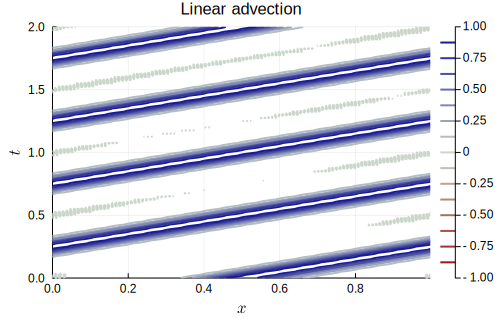

In [3]:
t = 2*(0:80)/80
U = reduce(hcat,u(t) for t in t)
contour(x,t,U',color=:redsblues,clims=(-1,1),
    xaxis=(L"x"),yaxis=(L"t"),title="Linear advection",
    right_margin=3Plots.mm)

In the space-time plot above, you can see the initial hump traveling rightward at constant speed. It fully traverses the domain once for each integer multiple of $t=1/2$. 

If we cut $h$ by a factor of 2 (i.e., double $m$), then the CFL condition suggests that the time step should be cut by a factor of 2 also.

In [4]:
println("Number of time steps for m = 400: $(length(u.t))")
x,u = demo(800)
println("Number of time steps for m = 800: $(length(u.t))")

Number of time steps for m = 400: 565
Number of time steps for m = 800: 1128


```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

(example-upwind-be)=
::::{proof:example}
Consider what happens in {numref}`Example {number} <example-upwind-centered>` if we replace Euler by backward Euler. Instead of {eq}`cflcenteuler`, we get

\begin{align*}
	(\mathbf{I} + c \tau \mathbf{D}_x)\mathbf{u}_{j+1} &=  \mathbf{u}_j, \\
	\mathbf{u}_{j+1} &= (\mathbf{I} + c \tau \mathbf{D}_x)^{-1} \mathbf{u}_j.
\end{align*}

The inverse of a tridiagonal matrix is not necessarily tridiagonal, and in fact $U_{i,j+1}$ depends on *all* of the data at time level $j$. Thus the numerical domain of dependence includes the entire real line, and the CFL condition is always satisfied. 
::::

{numref}`Example {number} <example-upwind-be>` is a special case of a more general conclusion.

:::{proof:observation}
An explicit time discretization must obey $\tau = O(h)$ as $h\to 0$ in order to solve {eq}`advectioncc`, while an implicit method is typically unrestricted by the CFL condition.
:::

## Upwinding

There are other ways to discretize the $u_x$ term in the advection equation {eq}`advectioncc`. The implications of the CFL criterion may differ greatly depending on which is chosen.

(example-upwind-onesided)=
::::{proof:example}
Suppose we use the backward difference 

:::{math}
:label: cflbackward 
  u_x(x_i,t_j)  \approx \frac{U_{i,j}-U_{i-1,j}}{h}  
:::

together with an explicit scheme in time. Then $U_{i,j}$ depends only on points to the left of $x_i$., i.e., the upwind direction of the numerical method is to the left. But if $c<0$, 
the upwind direction of the PDE is to the right. Hence it is impossible to satisfy the CFL condition.

Pairing the forward difference 

:::{math}
:label: cflforward
  u_x(x_i,t_j)  \approx \frac{U_{i+1,j}-U_{i,j}}{h}
:::

with explicit time stepping leads to the inverse conclusion: its upwind direction is to the right, and it must fail if $c>0$. 
::::

It's clear that when the domain of dependence and the numerical method both have a directional preference, they must agree.

:::{proof:observation} Upwinding
If a numerical method has an upwinding direction, it must be the same as the upwind direction of the PDE.
:::

It might seem like one should always use a centered difference scheme so that upwinding is not an issue. However, at a shock front, this requires differencing across a jump in the solution, which causes its own difficulties.

## Inflow boundary condition

```{index} ! boundary conditions; inflow
```

Now suppose that {eq}`advectioncc` is posed on the finite domain $x \in [a,b]$. 
Since the PDE has only a first-order derivative in $x$, we should have only one boundary condition. Should it be specified at the left end, or the right end?

If we impose a condition at the downwind side of the domain, there is no way for that boundary information to propagate into the interior of the domain as time advances. On the other hand, for points close to the upwind boundary, the domain of dependence eventually wants to move past the left boundary. This is impossible, so instead the domain of dependence has to stay there. 

In summary, we require an **inflow** condition on the PDE. For $c>0$ this is at the left end, and for $c<0$ it is at the right end. This requirement is true of the exact PDE as well as any discretization of it.

(demo-upwind-direction)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

If we solve advection over $[0,1]$ with velocity $c=-1$, the right boundary is in the upwind/inflow direction. Thus a well-posed boundary condition is $u(1,t)=0$.

We'll pattern a solution after {numref}`Function {number} <function-parabolic>`. Since $u(x_m,t)=0$, we define the ODE interior problem {eq}`mol-interior` for $\mathbf{v}$ without $u_m$. For each evaluation of $\mathbf{v}'$, we must extend the data back to $x_m$ first.

In [5]:
m = 80
x,Dₓ = FNC.diffcheb(m,[0,1])

int = 1:m
extend = v -> [v;0]

function ode!(f,v,c,t)
    u = extend(v)
    uₓ = Dₓ*u
    @. f = -c*uₓ[int]
end;

Now we solve for an initial condition that has a single hump.

In [6]:
init = @. exp(-80*(x[int]-0.5)^2)
ivp = ODEProblem(ode!,init,(0.,1),-1)
u = solve(ivp);

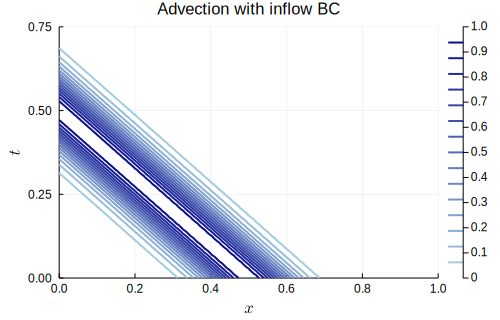

In [7]:
t = range(0,0.75,80)
U = reduce(hcat,extend(u(t)) for t in t)
contour(x,t,U',color=:blues,clims=(0,1),
    xaxis=(L"x"),yaxis=(L"t"),title="Advection with inflow BC")

We find that the hump gracefully exits out the downwind end.

In [8]:
anim = @animate for t in range(0,1,length=161) 
    plot(x,extend(u(t)),label=@sprintf("t=%.4f",t),
        xaxis=(L"x"), yaxis=(L"u(x,t)",(0,1)), 
        title="Advection equation with inflow BC",dpi=100)
end
mp4(anim,"upwind-inflow.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/repos/fnc-julia/advection/upwind-inflow.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/Users/driscoll/repos/fnc-julia/advection/upwind-inflow.mp4")

If instead of $u(1,t)=0$ we were to try to impose the downwind condition $u(0,t)=0$, we only need to change the index of the interior nodes and where to append the zero value.

In [9]:
int = 2:m+1
extend = v -> [0;v]

init = @. exp(-80*(x[int]-0.5)^2)
ivp = ODEProblem(ode!,init,(0.,0.25),-1)
u = solve(ivp);

In [10]:
t = range(0,0.1,length=61)
U = reduce(hcat,extend(u(t)) for t in t)
contour(x,t,U',color=:redsblues,clims=(-1,1),
    xaxis=(L"x"),yaxis=(L"t"),title="Advection with outflow BC",
    right_margin=3Plots.mm)

This time, the solution blows up as soon as the hump runs into the boundary because there are conflicting demands there.

In [11]:
anim = @animate for t in range(0,0.1,length=41) 
    plot(x,extend(u(t)),label=@sprintf("t=%.4f",t),
        xaxis=(L"x"), yaxis=(L"u(x,t)",(0,1)), 
        title="Advection equation with outflow BC",dpi=100)
end
mp4(anim,"upwind-outflow.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/repos/fnc-julia/advection/upwind-outflow.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/Users/driscoll/repos/fnc-julia/advection/upwind-outflow.mp4")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


## Exercises

1. ✍ Suppose you want to model the weather, including winds up to speed $200$ km/hr, using an explicit method with a second-order centered spatial discretization. If the shortest time step you can take is 4 hr, what is the CFL limit on the spatial resolution of the model? Is this a lower bound or an upper bound?


2. ✍ Suppose you want to model the traffic on a high-speed freeway using an explicit method with a second-order centered spatial discretization. Derive a CFL condition on the allowable time step, stating your assumptions carefully.

3. ✍ For the heat equation, the domain of dependence at any $(x,t)$ with $t>0$ is all of $x \in (-\infty,\infty)$. Show that the CFL condition implies that $\tau/h\to 0$ is required for convergence as $h\to 0$.

4. ✍ Suppose you wish to solve $u_t = u u_x$ for $x\in[-1,1]$.
    
    **(a)** If $u(x,0) = -2+\sin(\pi x)$,  which end of the domain is the inflow? 
    
    **(b)** Does the answer to part (a) change if $u(x,0) = 1 + e^{-16x^2}$?